In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# 1. Data loading and splitting

In [19]:
data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1437, 64)

In [21]:
def augment_data(X, y, n=18):
    X_augmented = X.copy()
    y_augmented = y.copy()
    for i in range(n):
        X_noise = np.random.normal(0, 0.1, size=X.shape)
        X_augmented = np.vstack((X_augmented, X + X_noise))
        y_augmented = np.hstack((y_augmented, y))
    return X_augmented, y_augmented

In [22]:
X_train, y_train = augment_data(X_train, y_train)

In [23]:
X_train.shape

(27303, 64)

# 2. Data preprocessing

## 2.1 Scaling and feature selection

In [24]:
preprocessor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('selector', SelectKBest(f_classif, k=20))
])

In [25]:
X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)
X_test_preprocessed = preprocessor.transform(X_test)

## 2.2 Dimensionality reduction with PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_preprocessed)

# 3. Data visualization

## 3.1 Feature importance

In [28]:
import matplotlib.pyplot as plt

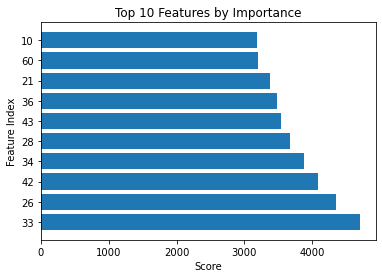

In [29]:
selector = preprocessor.named_steps['selector']
feature_scores = selector.scores_
top_10_indices = feature_scores.argsort()[-10:][::-1]
top_10_scores = feature_scores[top_10_indices]

plt.barh(range(10), top_10_scores)
plt.xlabel('Score')
plt.yticks(range(10), top_10_indices)
plt.ylabel('Feature Index')
plt.title('Top 10 Features by Importance')
plt.show()


## 3.2 PCA visualization

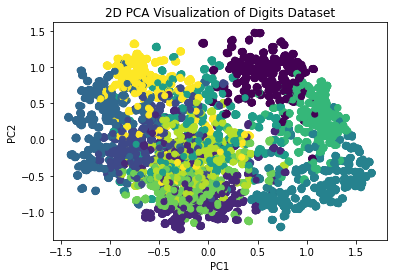

In [30]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Visualization of Digits Dataset')
plt.show()


# 4. Feature Engineering

## 4.1 Polynomial features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_preprocessed)
X_test_poly = poly.transform(X_test_preprocessed)

# 5. Model training and evaluation

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid ={
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [35]:
clf = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_train_poly, y_train)

In [ ]:
print("Best parameters: ", grid.best_params_)
print("Training accuracy: ", grid.best_score_)
print("Test accuracy: ", grid.score(X_test_poly, y_test))